# Baibhav Kaphle
# ACE080BEI008

## Task 1 | Simple Linear Regression

1️⃣ Data Retrieval and Collection:

In this pipeline we load Califorina housing datasets and show basic information


In [12]:
import pandas as pd
from sklearn import datasets
data = datasets.fetch_california_housing(as_frame=True) 
df=data.frame
print("shape :",df.shape)
print("\ncolumn names :",df.columns)


shape : (20640, 9)

column names : Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


2️⃣ Data Cleaning

In this pipeline we check for the missing value. if missing value is to be found, imputation is performed

In [13]:
print("\nmissing value :")
print(df.isnull().sum())


missing value :
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [14]:
print("\nData types :")
print(df.dtypes)



Data types :
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


### Observation

Since no data were lost, imputation was not required. Also treatment wasn't done as it was unnecessary.


3️⃣ Feature Design

In [15]:
x=df[['HouseAge']]
y=df['MedHouseVal']

This feature was chosen so that it could provide value and data on housing aand how its price is being affected or altered due to various components like its aging factor and many more

4️⃣ Algorithm Selection

In [ ]:
from sklearn.linear_model import LinearRegression


In algorithm selector, linear regression is taken as algorithm as our goal is to predict the **median house value**.

The algorithm works in the following manner:
-How much the house value changes when house age increases
-he starting value when house age is zero

Thus linear regression is used for the prediction of housing prices based on their age.

5️⃣ Loss Function Selection

Mean Squared Error (MSE) is used as the loss function for the linear regression model.

Mathematically,
MSE = (1/n) Σ (y_actual − y_predicted)²

Application of MSE:

1.Squaring the errors ensures all values are positive

2.Larger errors are penalized more heavily

3.It provides a clear measure of prediction accuracy



6️⃣ Model Learning (Training)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Learning process

The model learns best fitting line by calculating **coefficient** and **intercepts**. it also tends to minimize MSE.

7️⃣ Model Evaluation

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 1.2939617265100323
R² Score: 0.012551235533311389


**Mean Squared Error (MSE)**: 1.2939
The MSE value indicates the average squared difference between the actual and predicted house values.
A higher MSE means the predictions are far from the actual values.

**R² Score**: 0.0126 (≈ 1.26%)
The R² score shows how much of the variation in house prices is explained by the model.
Since the R² score is only 1.26%, the model is not able to explain the variation in house prices well using only HouseAge.

## Extra

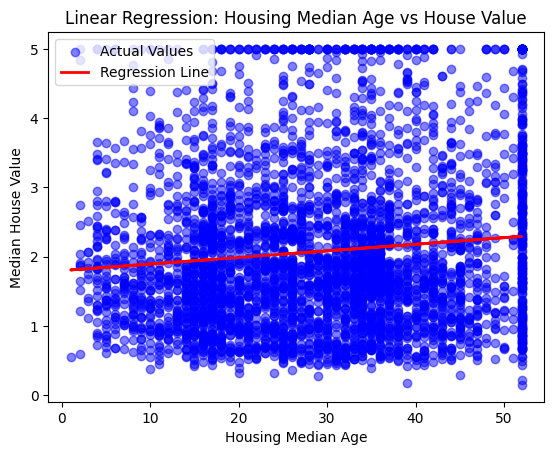

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Linear Regression: Housing Median Age vs House Value")
plt.legend()
plt.show()

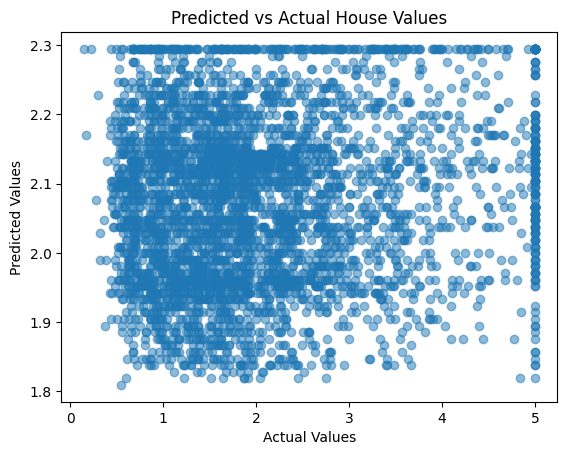

In [20]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual House Values")
plt.show()

### Assumptions of Linear Regression

1. **Linearity**

  The relationship between the independent and dependent variables is linear.


2. **Homoscedasticity of Residuals**

The variance of residuals remains constant across all levels of the independent variables.


3. **Multivariate Normality**

The residuals follow a normal distribution when multiple predictors are involved.


4. **Independence of Errors**
   
Residuals must not correlate with each other across observations.


5. **Lack of Multicollinearity**

The independent variables are not highly correlated with each other.

## Task-2 | Multiple Linear Regression

1️⃣ Data Retrieval and Collection

In [21]:
import pandas as pd
from sklearn import datasets
data = datasets.fetch_california_housing(as_frame=True) 
df=data.frame
print("shape :",df.shape)
print("\ncolumn names :",df.columns)

shape : (20640, 9)

column names : Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


2️⃣ Data Cleaning

In [22]:
print("\nmissing value :")
print(df.isnull().sum())


missing value :
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [23]:
print("\nData types :")
print(df.dtypes)



Data types :
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


3️⃣ Feature Design

In [24]:
X = df.drop(columns=['MedHouseVal'])
y=df['MedHouseVal']

In feature design, target variable(MedHouseVal) is avoided. instead all the features are used. Using multiple feature increases the  prediction performance


Now, feature scaling is done to standarize the data sets


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4️⃣ Algorithm Selection

Linear regression is again used as algorithm as target variable is continuous and many input data are there.

This algorithm also shows the relationship between multipe inputs and target variable using linear equation

5️⃣ Loss Function Selection

Mean squared Error(MSE) is used as loss function.
IT is the average squared difference between actual and predicted values.

*for better performance, MSE value should be less/low*



6️⃣ Model Learning (Training)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [27]:
model=LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


7️⃣ Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 1.2939617265100323
R² Score: 0.012551235533311389


### Interpretation

The model performance improves due to multiple features available as it doesnt only depend on HouseAge.
The higher R^2 shows that the model can explain more variable in house pricing.

In [29]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 1.7997500158647486
Coefficients: [0.00951462]


### Model Interpretation
Intercept The predicted house price when all features are 0.

**Coefficients**
Each coefficient represents the effect of one feature on the target variable while keeping other features constant.
For example, a positive coefficient for Median Income means higher income leads to higher house price.

**Difference from Task 1**
Task 1 uses only HouseAge datasets.
Task 2 uses all features, so it provides more accurate predictions but is slightly harder to interpret.

### Model Comparison 


**Which model performs better?**

Task 2 performs better because it uses multiple features.



**Why multiple features help?** 
    
Housing price depends on many factors like income, rooms, population, location, etc.Thus, it can provide more precise predictions.

**Which model is easier to interpret?**

Unlike Task 2, which has multiple features,Task 1  has only one feature.Due to less feature, Task 1 is easier to interpret.
